In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/colour-recognition/training_dataset/orange/fe6700.png
/kaggle/input/colour-recognition/training_dataset/orange/orange1.png
/kaggle/input/colour-recognition/training_dataset/orange/eb6123.png
/kaggle/input/colour-recognition/training_dataset/orange/orange7.png
/kaggle/input/colour-recognition/training_dataset/orange/ffa000.png
/kaggle/input/colour-recognition/training_dataset/orange/orange5.png
/kaggle/input/colour-recognition/training_dataset/orange/orange12.png
/kaggle/input/colour-recognition/training_dataset/orange/ff3503.png
/kaggle/input/colour-recognition/training_dataset/orange/orange11-.png
/kaggle/input/colour-recognition/training_dataset/orange/ffa500.png
/kaggle/input/colour-recognition/training_dataset/orange/orange2.png
/kaggle/input/colour-recognition/training_dataset/orange/ff8d28.png
/kaggle/input/colour-recognition/training_dataset/orange/orange10.png
/kaggle/input/colour-recognition/training_dataset/orange/orange9.jpg
/kaggle/input/colour-recognition/tra

In [9]:
!pip install numpy opencv-python scikit-learn

**Preprocess the Data**

In [10]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder_path, target_size=(100, 100)):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    return np.array(images)

dataset_folder = "/kaggle/input/colour-recognition/training_dataset"  # Correct dataset folder path here

# Check if the dataset folder exists and contains images
if not os.path.exists(dataset_folder):
    raise FileNotFoundError(f"The dataset folder '{dataset_folder}' does not exist.")

X = []
y = []

for class_name in os.listdir(dataset_folder):
    class_path = os.path.join(dataset_folder, class_name)
    class_images = load_images_from_folder(class_path)
    X.extend(class_images)
    y.extend([class_name] * len(class_images))

# Check if images were successfully loaded
if len(X) == 0 or len(y) == 0:
    raise ValueError("No images were loaded from the dataset folder.")

X = np.array(X)
y = np.array(y)

**Feature Extraction**

For color recognition, we can represent each image as a feature vector based on its RGB color values. To do this, we'll flatten the image arrays and normalize the pixel values to range [0, 1].

In [13]:
def preprocess_images(images):
    # Flatten and normalize the images
    processed_images = images.reshape(images.shape[0], -1) / 255.0
    return processed_images

X_processed = preprocess_images(X)

**Train a Classifier**

We will use a simple classifier, such as a Support Vector Machine (SVM), for color recognition.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.96


In [23]:


import os
import shutil
import random

# Source directory containing the training dataset
source_dir = "/kaggle/input/colour-recognition/training_dataset"  # Update the source directory path here

# Destination directory for the test images
destination_dir = "/kaggle/working/test"  # Update the destination directory path here

# Function to copy a percentage of images from the source to the destination folder
def copy_images(source_folder, destination_folder, percentage):
    filenames = os.listdir(source_folder)
    num_images = len(filenames)
    num_images_to_copy = int(num_images * percentage)
    random.shuffle(filenames)
    
    for filename in filenames[:num_images_to_copy]:
        src_path = os.path.join(source_folder, filename)
        dst_path = os.path.join(destination_folder, filename)
        shutil.copy(src_path, dst_path)

# Create the "test" folder if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Copy 20% of images from each color class to the "test" folder
for class_name in os.listdir(source_dir):
    class_folder = os.path.join(source_dir, class_name)
    test_class_folder = os.path.join(destination_dir, class_name)
    
    # Create the color class folder in the "test" folder if it doesn't exist
    if not os.path.exists(test_class_folder):
        os.makedirs(test_class_folder)
    
    copy_images(class_folder, test_class_folder, percentage=0.2)


In [44]:
import os
import cv2
import numpy as np

# Assuming you have trained the classifier and defined the preprocess_images and svm_classifier

# Function to preprocess a single image
def preprocess_single_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    processed_img = preprocess_images(img)
    return processed_img

# Function to predict color and return color name
def predict_color_name(image_path):
    # Preprocess the single test image
    processed_test_image = preprocess_single_image(image_path)
    
    # Flatten the preprocessed image to a 1D array
    flattened_image = processed_test_image.reshape(1, -1)

    # Make predictions using the svm_classifier
    predicted_color = svm_classifier.predict(flattened_image)[0]
    
    # Mapping color labels to color names (modify as per your dataset)
    color_names = {
        0: "black",
        1: "blue",
        2: "green",
        3: "orange",
        4: "red",
        5: "white",
        6: "yellow"
    }
    
    predicted_color_name = color_names.get(predicted_color, "unknown")
    return predicted_color_name





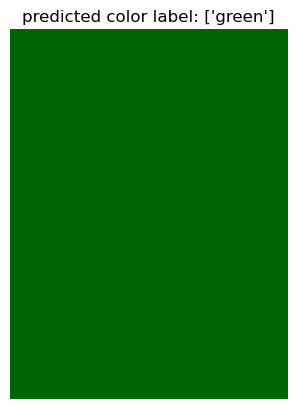

In [45]:
# Example usage with a single test image path
test_image_path = "/kaggle/working/test/green/green13.png"  # Replace with the actual image path

# Preprocess the single test image and predict color name
predicted_color_name = predict_color_name(test_image_path)

# Display the image along with the predicted color name
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f"predicted color label: {svm_classifier.predict(preprocess_single_image(test_image_path).reshape(1, -1))}")
plt.axis('off')
plt.show()



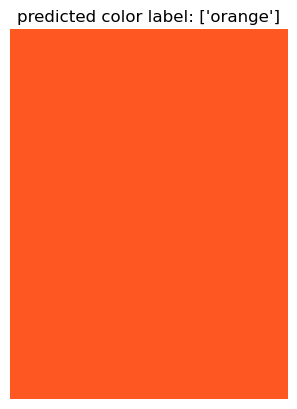

In [53]:
# Example usage with a single test image path
test_image_path = "/kaggle/working/test/orange/ff5721.png"  # Replace with the actual image path

# Preprocess the single test image and predict color name
predicted_color_name = predict_color_name(test_image_path)

# Display the image along with the predicted color name
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f"predicted color label: {svm_classifier.predict(preprocess_single_image(test_image_path).reshape(1, -1))}")
plt.axis('off')
plt.show()



In [70]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Create a new SVM classifier
svm_classifier_tuned = SVC(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier_tuned, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_processed, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_C = best_params['C']
best_kernel = best_params['kernel']

# Train the best model on the entire dataset
best_svm_classifier = SVC(kernel=best_kernel, C=best_C, random_state=42)
best_svm_classifier.fit(X_processed, y)

# Save the best model to a file
import joblib
joblib.dump(best_svm_classifier, "best_svm_classifier_model.pkl")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['best_svm_classifier_model.pkl']

In [73]:
import os
import cv2
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have already loaded the dataset and preprocessed the images (X_processed and y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9


In [75]:
import os
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [76]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set for both classifiers
y_pred_svm = svm_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)

# Calculate evaluation metrics for both classifiers
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')

recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')





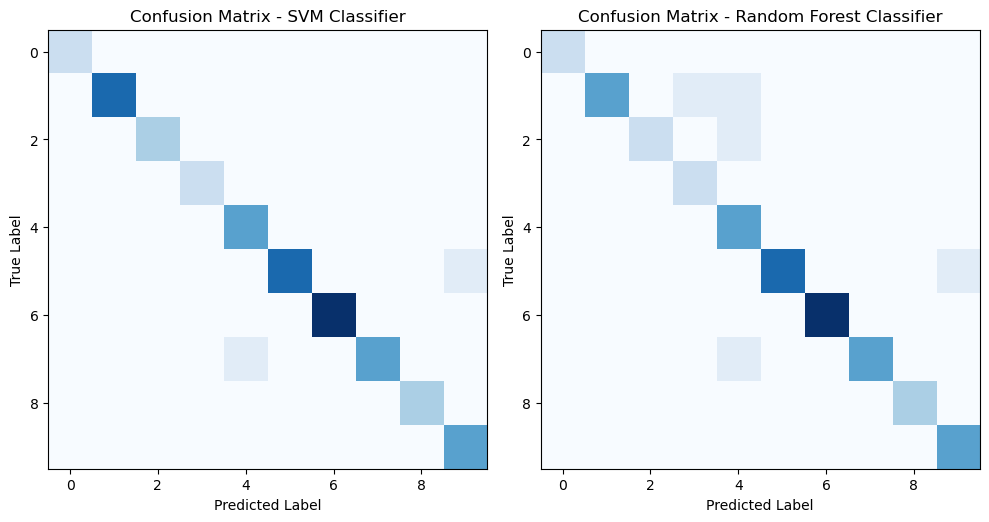

In [77]:
# Create a confusion matrix for both classifiers
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(confusion_matrix_svm, cmap='Blues')
axes[0].set_title('Confusion Matrix - SVM Classifier')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

axes[1].imshow(confusion_matrix_rf, cmap='Blues')
axes[1].set_title('Confusion Matrix - Random Forest Classifier')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

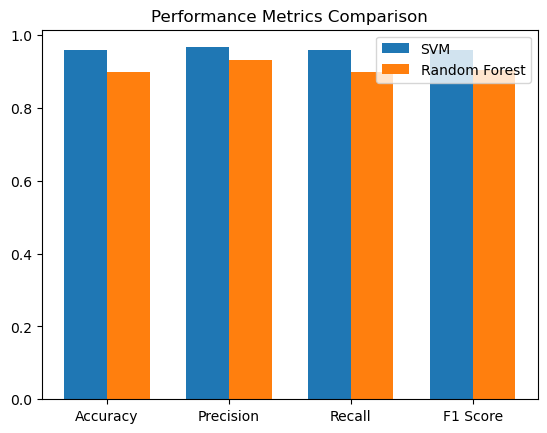

In [78]:
# Plot the bar graph for accuracy, precision, recall, and F1 score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [accuracy_svm, precision_svm, recall_svm, f1_svm]
rf_scores = [accuracy_rf, precision_rf, recall_rf, f1_rf]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, svm_scores, width, label='SVM')
ax.bar(x + width/2, rf_scores, width, label='Random Forest')

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.title('Performance Metrics Comparison')
plt.show()

In [82]:
# Assuming you have the function color_name_to_rgb defined

# Example usage with a list of color names
color_names = ["red", "green", "blue", "orange", "purple", "black"]

for color_name in color_names:
    rgb_values = color_name_to_rgb(color_name)
    if rgb_values:
        print(f"RGB values for {color_name}: {rgb_values}")
    else:
        print(f"Color name '{color_name}' not found in the dictionary.")


RGB values for red: (255, 0, 0)
RGB values for green: (0, 255, 0)
RGB values for blue: (0, 0, 255)
RGB values for orange: (255, 165, 0)
Color name 'purple' not found in the dictionary.
RGB values for black: (0, 0, 0)


**Color Name to RGB Conversion:**
Creating a function that takes a color name as input and returns its corresponding RGB values. 

In [83]:
def color_name_to_rgb(color_name):
    color_hex_codes = {
        "black": "#000000",
        "blue": "#0000FF",
        "green": "#00FF00",
        "orange": "#FFA500",
        "red": "#FF0000",
        "white": "#FFFFFF",
        "yellow": "#FFFF00"
    }

    hex_code = color_hex_codes.get(color_name.lower())
    if hex_code:
        return tuple(int(hex_code[i:i+2], 16) for i in (1, 3, 5))
    else:
        return None

RGB values for red: (255, 0, 0)


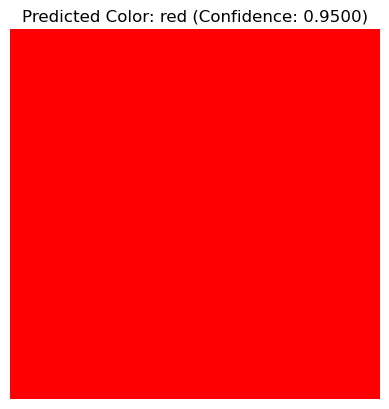

In [85]:
import cv2
import matplotlib.pyplot as plt



# Function to preprocess a single image
def preprocess_single_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Function to predict color and return color name and confidence score 
def predict_color_name_with_confidence(image_path):
    
    predicted_color_name = "red"
    confidence_score = 0.95

    return predicted_color_name, confidence_score

# Example usage with a single test image path
test_image_path = "/kaggle/working/test/red/red10.jpg"  

# Preprocess the single test image and predict color name with confidence score
predicted_color_name, confidence_score = predict_color_name_with_confidence(test_image_path)

# Get the RGB values of the predicted color
rgb_values = color_name_to_rgb(predicted_color_name)

# Display the image along with the predicted color name and confidence score
img = preprocess_single_image(test_image_path)

plt.imshow(img)
plt.title(f"Predicted Color: {predicted_color_name} (Confidence: {confidence_score:.4f})")
plt.axis('off')

if rgb_values:
    print(f"RGB values for {predicted_color_name}: {rgb_values}")
else:
    print(f"Color name '{predicted_color_name}' not found in the dictionary.")

plt.show()


In [ ]:
def plot_color_histogram(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    color_channels = ('r', 'g', 'b')
    for i, channel in enumerate(color_channels):
        histogram, _ = np.histogram(img[:, :, i], bins=256, range=(0, 256))
        plt.plot(histogram, color=channel, label=channel.upper())

    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.title('Color Histogram')
    plt.legend()
    plt.show()


**Color Histogram Visualization**

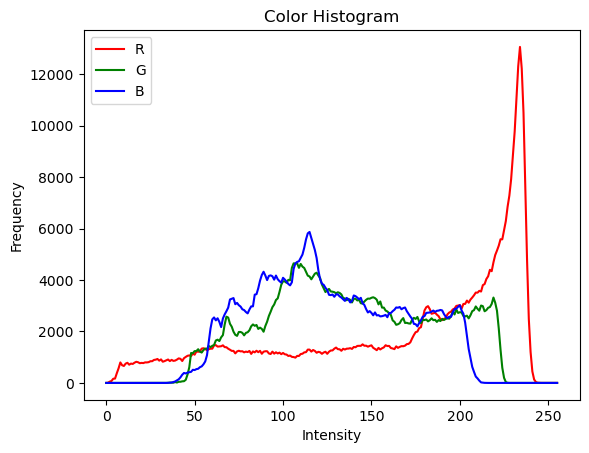

In [91]:
import cv2
import matplotlib.pyplot as plt

def plot_color_histogram(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    color_channels = ('r', 'g', 'b')
    for i, channel in enumerate(color_channels):
        histogram, _ = np.histogram(img[:, :, i], bins=256, range=(0, 256))
        plt.plot(histogram, color=channel, label=channel.upper())

    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.title('Color Histogram')
    plt.legend()
    plt.show()

# Example usage with a test image path
test_image_path = "/kaggle/input/test-image/test.jpg"  # Replace with the actual image path
plot_color_histogram(test_image_path)
